In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import numpy as np
from sklearn.metrics import accuracy_score

In [3]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

# Data

In [4]:
df = pd.read_csv(r"data/bank-additional-full.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Attributes information

Attribute Information:

Input variables:
**bank client data:**
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. housing: has housing loan? (categorical: 'no','yes','unknown')
7. loan: has personal loan? (categorical: 'no','yes','unknown')

**related with the last contact of the current campaign:**

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**other attributes:**

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

**social and economic context attributes**

16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
17. cons.price.idx: consumer price index - monthly indicator (numeric)
18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19. euribor3m: euribor 3 month rate - daily indicator (numeric)
20. nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. y - has the client subscribed a term deposit? (binary: 'yes','no')



# Analysis

In [5]:
#### Helper functions for analysis

In [6]:
def chisquare(df,x,y='y'):
    df = pd.concat([df.loc[df['y']=='yes',[x,'y']].groupby(x).agg({'y':'count'}).rename(columns={'y':'NoOfYes'}),
           df.loc[df['y']=='no',[x,'y']].groupby(x).agg({'y':'count'}).rename(columns={'y':'NoOfNo'})],axis=1)       
    df.fillna(0,inplace=True)
    stat, p, dof, expected = stats.chi2_contingency(df)
    df['%Yes'] = df['NoOfYes'] / (df['NoOfNo']+df['NoOfYes']) * 100
    df.sort_values('%Yes',ascending=False,inplace=True)   
    
    
    return stat, p, dof, expected, df

### Checking target variable ratio

In [7]:
df['y'].value_counts()/df['y'].shape[0]

no     0.887346
yes    0.112654
Name: y, dtype: float64

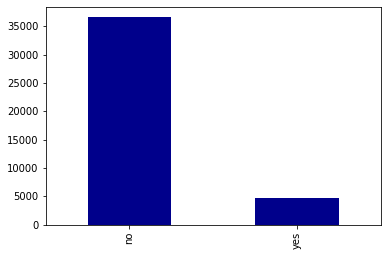

In [8]:
df['y'].value_counts().plot(kind='bar', color='darkblue')
plt.show()

### Understanding each variable

#### Age

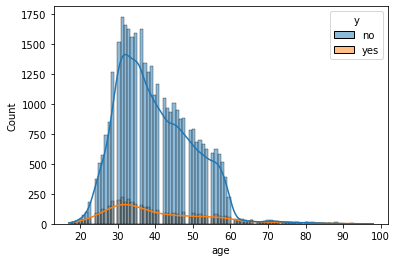

In [9]:
sns.histplot(data=df, x='age', hue='y', kde=True)
plt.show()

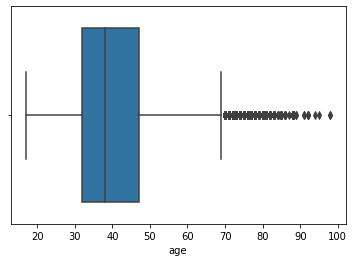

In [10]:
sns.boxplot(x=df['age'])
plt.show()

> Lets remove Age above 70 for further analysis if age has any factor of influence on outcome

In [11]:
### Remove outliers from age

In [12]:
df_age = df.loc[df['age'] <= 70,['age','y']]

In [13]:
### First method: comparing two means

In [14]:
stats.ttest_ind(df.loc[df['y']=='yes','age'],
                df.loc[df['y']=='no','age'])

Ttest_indResult(statistic=6.172087109640128, pvalue=6.80213641846347e-10)

In [15]:
### 2nd method: using one way ANOVA

In [16]:
stats.f_oneway(df.loc[df['y']=='yes','age'],
                df.loc[df['y']=='no','age'])

F_onewayResult(statistic=38.09465928898563, pvalue=6.802136418528356e-10)

#### job

In [17]:
### tesnting its significance using chi-square test

In [18]:
stat, p, dof, expected, job_df2 = chisquare(df,'job','y')
print(f"P value: {p}")

P value: 4.189763287563623e-199


In [19]:
### Printing observed contingency table for reference 
job_df2

,NoOfYes,NoOfNo,%Yes
job,,,
student,275,600,31.428571
retired,434,1286,25.232558
unemployed,144,870,14.201183
admin.,1352,9070,12.972558
management,328,2596,11.217510
unknown,37,293,11.212121
technician,730,6013,10.826042
self-employed,149,1272,10.485574
housemaid,106,954,10.000000


#### marital

In [20]:
### tesnting its significance using chi-square test

In [21]:
stat, p, dof, expected, marital_df = chisquare(df,'marital','y')
print(f"P value: {p}")

P value: 2.068014648442211e-26


In [22]:
### Printing observed contingency table for reference 
marital_df

,NoOfYes,NoOfNo,%Yes
marital,,,
unknown,12,68,15.000000
single,1620,9948,14.004149
divorced,476,4136,10.320902
married,2532,22396,10.157253


#### education

In [23]:
### tesnting its significance using chi-square test

In [24]:
stat, p, dof, expected, education_df = chisquare(df,'education','y')
print(f"P value: {p}")

P value: 3.3051890144025054e-38


In [25]:
### Printing observed contingency table for reference 
education_df

,NoOfYes,NoOfNo,%Yes
education,,,
illiterate,4,14,22.222222
unknown,251,1480,14.500289
university.degree,1670,10498,13.724523
professional.course,595,4648,11.348465
high.school,1031,8484,10.835523
basic.4y,428,3748,10.249042
basic.6y,188,2104,8.202443
basic.9y,473,5572,7.824648


#### default

In [26]:
### tesnting its significance using chi-square test

In [27]:
stat, p, dof, expected, default_df = chisquare(df,'default','y')
print(f"P value: {p}")

P value: 5.161957951391489e-89


In [28]:
### Printing observed contingency table for reference 
default_df

,NoOfYes,NoOfNo,%Yes
default,,,
no,4197.0,28391,12.878974
unknown,443.0,8154,5.152960
yes,0.0,3,0.000000


#### housing

In [29]:
### tesnting its significance using chi-square test

In [30]:
stat, p, dof, expected, housing_df = chisquare(df,'housing','y')
print(f"P value: {p}")

P value: 0.05829447669453452


In [31]:
### Printing observed contingency table for reference 
housing_df

,NoOfYes,NoOfNo,%Yes
housing,,,
yes,2507,19069,11.619392
no,2026,16596,10.879605
unknown,107,883,10.808081


#### loan

In [32]:
### tesnting its significance using chi-square test

In [33]:
stat, p, dof, expected, loan_df = chisquare(df,'loan','y')
print(f"P value: {p}")

P value: 0.5786752870441755


In [34]:
### Printing observed contingency table for reference 
loan_df

,NoOfYes,NoOfNo,%Yes
loan,,,
no,3850,30100,11.340206
yes,683,5565,10.931498
unknown,107,883,10.808081


#### month

In [35]:
### tesnting its significance using chi-square test

In [36]:
stat, p, dof, expected, month_df = chisquare(df,'month','y')
print(f"P value: {p}")

P value: 0.0


In [37]:
month_df

,NoOfYes,NoOfNo,%Yes
month,,,
mar,276,270,50.549451
dec,89,93,48.901099
sep,256,314,44.912281
oct,315,403,43.871866
apr,539,2093,20.478723
aug,655,5523,10.602137
jun,559,4759,10.511470
nov,416,3685,10.143867
jul,649,6525,9.046557


#### day_of_week

In [38]:
### tesnting its significance using chi-square test

In [39]:
stat, p, dof, expected, day_of_week_df = chisquare(df,'day_of_week','y')
print(f"P value: {p}")

P value: 2.9584820052785324e-05


In [40]:
### Printing observed contingency table for reference 
day_of_week_df

,NoOfYes,NoOfNo,%Yes
day_of_week,,,
thu,1045,7578,12.118752
tue,953,7137,11.779975
wed,949,7185,11.667076
fri,846,6981,10.808739
mon,847,7667,9.948320


#### emp.var.rate

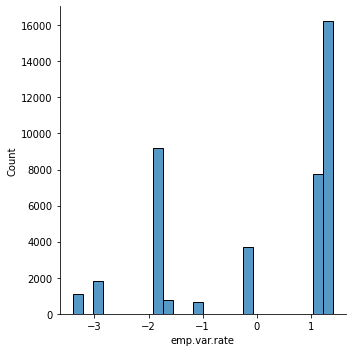

In [41]:
sns.displot(x=df['emp.var.rate'])

In [42]:
### tesnting its significance using chi-square test

In [43]:
stat, p, dof, expected, emp_var_rate_df = chisquare(df,'emp.var.rate','y')
print(f"P value: {p}")

### Printing observed contingency table for reference 
emp_var_rate_df

P value: 0.0


,NoOfYes,NoOfNo,%Yes
emp.var.rate,,,
-1.7,403,370,52.134541
-3.0,88,84,51.162791
-1.1,301,334,47.401575
-3.4,454,617,42.390289
-2.9,594,1069,35.718581
-1.8,1461,7723,15.908101
-0.2,1,9,10.000000
-0.1,232,3451,6.299213
1.4,866,15368,5.334483


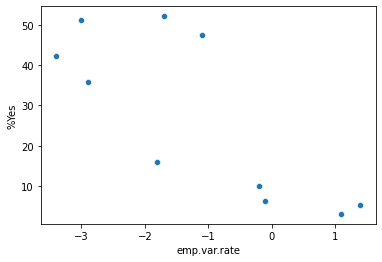

In [44]:
emp_var_rate_df.reset_index(inplace=True)
emp_var_rate_df.rename(columns = {'index':'emp.var.rate'})
emp_var_rate_df

sns.scatterplot(x='emp.var.rate', y='%Yes', data=emp_var_rate_df)
plt.show()

In [45]:
emp_var_rate_df[['emp.var.rate','%Yes']].corr()

,emp.var.rate,%Yes
emp.var.rate,1.000000,-0.785899
%Yes,-0.785899,1.000000


### cons.price.idx

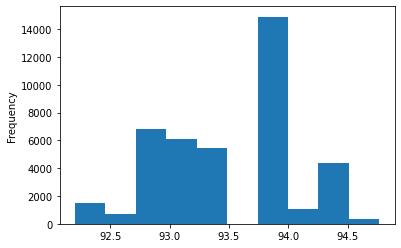

In [46]:
df['cons.price.idx'].plot(kind='hist')
plt.show()

In [47]:
stat, p, dof, expected, cons_price_idx_df = chisquare(df,'cons.price.idx','y')
print(f"P value: {p}")

### Printing observed contingency table for reference 
cons_price_idx_df

P value: 0.0


,NoOfYes,NoOfNo,%Yes
cons.price.idx,,,
93.798,42,25,62.686567
93.876,122,90,57.547170
93.369,150,114,56.818182
94.215,176,135,56.591640
93.749,97,77,55.747126
94.027,120,113,51.502146
92.713,88,84,51.162791
94.199,150,153,49.504950
92.649,168,189,47.058824


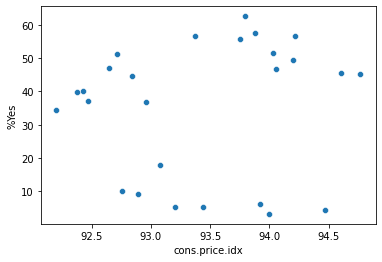

In [48]:
cons_price_idx_df.reset_index(inplace=True)
cons_price_idx_df.rename(columns = {'index':'cons.price.idx'})
cons_price_idx_df

sns.scatterplot(x='cons.price.idx', y='%Yes', data=cons_price_idx_df)
plt.show()

<AxesSubplot: xlabel='y', ylabel='cons.price.idx'>

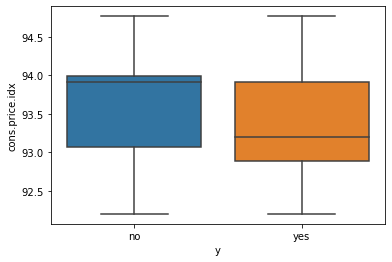

In [49]:
sns.boxplot(x='y',y='cons.price.idx',data=df)

In [50]:
### 2nd method: using one way ANOVA

In [51]:
stats.f_oneway(df.loc[df['y']=='yes','cons.price.idx'],
                df.loc[df['y']=='no','cons.price.idx'])

F_onewayResult(statistic=778.5897856865838, pvalue=9.318964779562635e-170)

### euribor3m

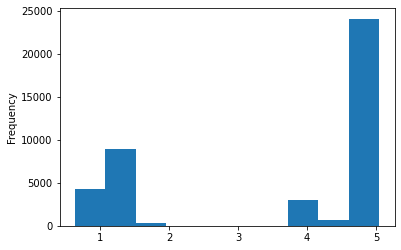

In [52]:
df['euribor3m'].plot(kind='hist')
plt.show()

In [53]:
stat, p, dof, expected, euribor3m_df = chisquare(df,'euribor3m','y')
print(f"P value: {p}")

### Printing observed contingency table for reference 
euribor3m_df

P value: 0.0


,NoOfYes,NoOfNo,%Yes
euribor3m,,,
3.053,1.0,0.0,100.000000
0.688,3.0,0.0,100.000000
0.933,1.0,0.0,100.000000
0.870,12.0,1.0,92.307692
0.885,9.0,1.0,90.000000
...,...,...,...
0.914,0.0,3.0,0.000000
0.894,0.0,3.0,0.000000
0.891,0.0,4.0,0.000000


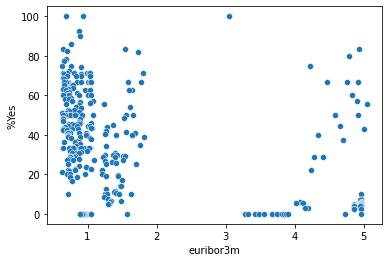

In [54]:
euribor3m_df.reset_index(inplace=True)
euribor3m_df.rename(columns = {'index':'euribor3m'})
euribor3m_df

sns.scatterplot(x='euribor3m', y='%Yes', data=euribor3m_df)
plt.show()

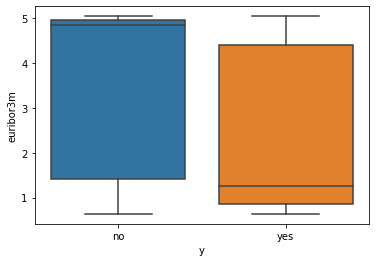

In [55]:
sns.boxplot(x='y',y='euribor3m',data=df)
plt.show()

In [56]:
### 2nd method: using one way ANOVA

In [57]:
stats.f_oneway(df.loc[df['y']=='yes','euribor3m'],
                df.loc[df['y']=='no','euribor3m'])

F_onewayResult(statistic=4309.479048107805, pvalue=0.0)

### nr.employed

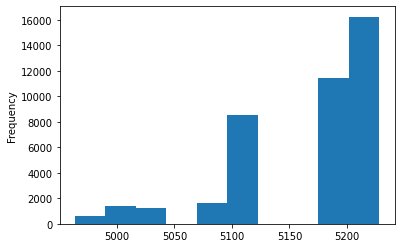

In [58]:
df['nr.employed'].plot(kind='hist')
plt.show()



In [59]:
stat, p, dof, expected, nr_employed_df = chisquare(df,'nr.employed','y')
print(f"P value: {p}")

### Printing observed contingency table for reference 
nr_employed_df

P value: 0.0


,NoOfYes,NoOfNo,%Yes
nr.employed,,,
5008.7,369,281,56.769231
4991.6,403,370,52.134541
5023.5,88,84,51.162791
4963.6,301,334,47.401575
5017.5,454,617,42.390289
5076.2,594,1069,35.718581
5099.1,1092,7442,12.795875
5176.3,1,9,10.000000
5195.8,232,3451,6.299213


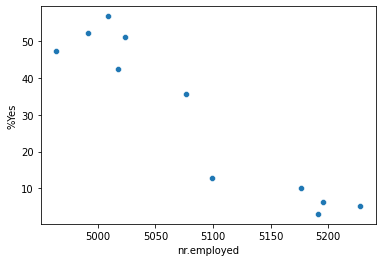

In [60]:
nr_employed_df.reset_index(inplace=True)
nr_employed_df.rename(columns = {'index':'nr.employed'})
nr_employed_df

sns.scatterplot(x='nr.employed', y='%Yes', data=nr_employed_df)
plt.show()

### campaign

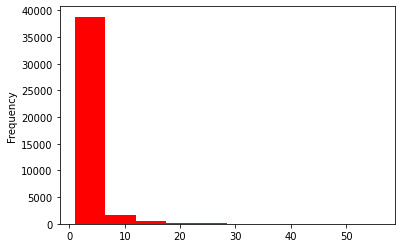

In [61]:
df['campaign'].plot(kind='hist',color='red')
plt.show()

<AxesSubplot: xlabel='y', ylabel='campaign'>

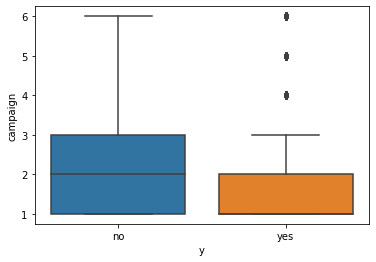

In [62]:
sns.boxplot(x='y',y='campaign',data=df[df['campaign']<7])

## Final Feature processing

implementing feature processign on entire data before splitting as the focus is not on the feature
preprocessing

In [63]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

### removign age above 70 and campaign above 7
data = df[(df['age']<71) & (df['campaign']<=7)]

### Converting job to onehot
oe = OneHotEncoder(sparse=False)
data[oe.get_feature_names(['job'])] = oe.fit_transform(data['job'].to_numpy().reshape(-1, 1))
data.drop(columns=['job'], inplace=True)

### Converting poutcome to onehot
oe = OneHotEncoder(sparse=False)
data[oe.get_feature_names(['poutcome'])] = oe.fit_transform(data['poutcome'].to_numpy().reshape(-1, 1))
data.drop(columns=['poutcome'], inplace=True)

### Converting marital to onehot
oe = OneHotEncoder(sparse=False)
data[oe.get_feature_names(['marital'])] = oe.fit_transform(data['marital'].to_numpy().reshape(-1, 1))
data.drop(columns=['marital'], inplace=True)

### Converting education to onehot
oe = OneHotEncoder(sparse=False)
data[oe.get_feature_names(['education'])] = oe.fit_transform(data['education'].to_numpy().reshape(-1, 1))
data.drop(columns=['education'], inplace=True)

### Converting default to onehot
oe = OneHotEncoder(sparse=False)
data[oe.get_feature_names(['default'])] = oe.fit_transform(data['default'].to_numpy().reshape(-1, 1))
data.drop(columns=['default'], inplace=True)

### month mean encoding

month_df = pd.concat([data[data['y']=='yes'].groupby(['month']).size(),
            data[data['y']=='no'].groupby(['month']).size()],
          axis=1
         )
month_df.reset_index(inplace=True)
month_df.columns = ['month', 'yes', 'no']
month_df['%yes'] = month_df['yes'] / (month_df['yes']+month_df['no']) * 100

month_means = dict(zip(month_df['month'],month_df['%yes']))
data.replace({'month':month_means},inplace=True)

### day_of_week mean encoding

day_df = pd.concat([data[data['y']=='yes'].groupby(['day_of_week']).size(),
            data[data['y']=='no'].groupby(['day_of_week']).size()],
          axis=1
         )
day_df.reset_index(inplace=True)
day_df.columns = ['day_of_week', 'yes', 'no']
day_df['%yes'] = day_df['yes'] / (day_df['yes']+day_df['no']) * 100

day_means = dict(zip(day_df['day_of_week'],day_df['%yes']))
data.replace({'day_of_week':day_means},inplace=True)



### Standard scaling all numeric columns
scaler = StandardScaler()
data.loc[:,['age','month', 'day_of_week', 
            'campaign', 'emp.var.rate', 'cons.price.idx',
            'cons.conf.idx', 'euribor3m', 'nr.employed']] = scaler.fit_transform(data[['age','month', 'day_of_week', 
                                                                                    'campaign', 'emp.var.rate', 'cons.price.idx',
                                                                                       'cons.conf.idx', 'euribor3m', 'nr.employed']])


### Removing all other non significant features
data.drop(columns=['housing','loan','contact','duration','pdays','previous'],inplace=True)

In [64]:
### Processign target columns

data['y'] = np.where(data['y']=='yes',1,0)

In [65]:
data.head()



,age,month,day_of_week,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_failure,poutcome_nonexistent,poutcome_success,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes
0,1.683161,-0.54696,-1.576141,-0.796328,0.658544,0.738689,0.898068,0.719619,0.338203,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.785903,-0.54696,-1.576141,-0.796328,0.658544,0.738689,0.898068,0.719619,0.338203,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.268946,-0.54696,-1.576141,-0.796328,0.658544,0.738689,0.898068,0.719619,0.338203,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.039281,-0.54696,-1.576141,-0.796328,0.658544,0.738689,0.898068,0.719619,0.338203,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.683161,-0.54696,-1.576141,-0.796328,0.658544,0.738689,0.898068,0.719619,0.338203,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [66]:
data.shape

(38998, 40)

### Ddvide the data

In [67]:
X = data.drop(columns=['y'])
y = data['y']

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42, stratify=y_rest)

In [68]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape

((23398, 39), (23398,), (7800, 39), (7800,), (7800, 39), (7800,))

## Models

Implementing Logistic regression from scratch

In [313]:
def logisticLoss(y,y_hat):
    return -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

class Adam:
    def __init__(self,lr=10**-1):
        self.lr = lr
        self.m = None
        self.v = None
        self.beta1 = 0.99
        self.beta2 = 0.9
        self.epsilon = 10**-8
        
    def optimize(self, model, grads):
        if self.m is None and self.v is None:
            self.m = np.zeros_like(grads)
            self.v = np.zeros_like(grads)
        self.m = self.beta1 * self.m + (1-self.beta1) * grads
        self.v = self.beta2 * self.v + (1-self.beta2) * grads ** 2
        
        m_hat = self.m / (1-self.beta1)
        v_hat = self.v / (1-self.beta2)
        
        model.W -= lr * m_hat / (np.sqrt(v_hat+self.epsilon))
        

class LogisticRegression:
    
    def __init__(self):
        self.W = None        
        self.history = {'loss':[], 'weights':(), 'accuracy':[], 'val_accuracy':[]}        
    
        
    def train(self,X,y,epochs=10,lr=10**-3):
        X = X.to_numpy()
        y = y.to_numpy()        
        n = X.shape[0] ## Number of examples
        
        ## Initialize the weights
        n_params = X.shape[1]+1 ## Number of parameters(or weights) + 1 for bias
        lower, upper = -(1.0 / math.sqrt(n_params)), (1.0 / math.sqrt(n_params))
        self.W = np.random.uniform(lower, upper, size=n_params).reshape(n_params,1)
        self.W[0,0] = 1 ## bias
        
        ## Training loop for number of epochs
        for e in range(epochs):
            ## Loss and gradients of this iteration set to zeros
            L = 0
            grads = np.zeros((n_params,1))
            
            ## Forword propagation
            ## For each training example calculate loss and gradient
            for i in range(n):
                x = X[i,:].reshape(X.shape[1],1)
                x = np.vstack((np.ones((1,1)),x)) ## adding x0 = 1
                z = np.dot(self.W.T,x) 
                y_hat = 1 / (1 + np.exp(-z))
                error = logisticLoss(y[i],y_hat)
                L += error
                
                ## Find gradients                
                dy_hat = y_hat * (1-y[i]) - y[i] * (1-y_hat)/ (y_hat * (1-y_hat))
                dz = np.exp(-z)/(1+np.exp(-z))**2
                grads +=  dy_hat * dz * x

            
            ## For each epoch calculate metrics and update weights
            loss = L/n
            val_accuracy = accuracy_score(y_test,self.predict(X_test))
            accuracy = accuracy_score(y_train,self.predict(X_train))
            
            ### Log history
            self.history['loss'].append(loss[0][0])
            self.history['weights'] += (np.copy(self.W),)            
            self.history['accuracy'].append(accuracy)
            self.history['val_accuracy'].append(val_accuracy)            
            print(f"Epoch {e+1} / {epochs} \n loss: {loss[0][0]} Accuracy: {accuracy} val_accuracy: {val_accuracy}")
            
            ### Update parameters    
            
            self.W -= lr * grads / n
                 
            
            
                    
    def predict(self,X,thresh=0.5):
        X = np.hstack((np.ones((X.shape[0],1)),X)) ## adding x0 = 1
        z = np.dot(X,self.W) 
        y_hat = 1 / (1 + np.exp(-z))
        y_hat = np.where(y_hat > thresh,1,0)
        return y_hat
    def weights(self):
        return self.W

In [314]:
lr = LogisticRegression()
grads = lr.train(X_train,y_train,100,10**-1)

Epoch 1 / 100 
 loss: 1.1430049670821747 Accuracy: 0.11133430207710061 val_accuracy: 0.11217948717948718
Epoch 2 / 100 
 loss: 1.1230024426186422 Accuracy: 0.11193264381571075 val_accuracy: 0.11269230769230769
Epoch 3 / 100 
 loss: 1.1031560672057203 Accuracy: 0.11188990512009574 val_accuracy: 0.11269230769230769
Epoch 4 / 100 
 loss: 1.0834967675808571 Accuracy: 0.11163347294640567 val_accuracy: 0.11320512820512821
Epoch 5 / 100 
 loss: 1.0640555057496404 Accuracy: 0.11180442772886572 val_accuracy: 0.1141025641025641
Epoch 6 / 100 
 loss: 1.0448629325671037 Accuracy: 0.11193264381571075 val_accuracy: 0.11384615384615385
Epoch 7 / 100 
 loss: 1.0259490284940673 Accuracy: 0.11188990512009574 val_accuracy: 0.1135897435897436
Epoch 8 / 100 
 loss: 1.0073427413190612 Accuracy: 0.11210359859817079 val_accuracy: 0.11307692307692307
Epoch 9 / 100 
 loss: 0.9890716314607751 Accuracy: 0.11206085990255578 val_accuracy: 0.11333333333333333
Epoch 10 / 100 
 loss: 0.9711615357498725 Accuracy: 0.112

Epoch 80 / 100 
 loss: 0.5135669099453584 Accuracy: 0.8020343619112744 val_accuracy: 0.8106410256410257
Epoch 81 / 100 
 loss: 0.5121388558997961 Accuracy: 0.8023762714761945 val_accuracy: 0.8108974358974359
Epoch 82 / 100 
 loss: 0.5107518271399664 Accuracy: 0.8030173519104197 val_accuracy: 0.8115384615384615
Epoch 83 / 100 
 loss: 0.5094043870429987 Accuracy: 0.8034020001709548 val_accuracy: 0.8116666666666666
Epoch 84 / 100 
 loss: 0.5080951613744074 Accuracy: 0.80429951277887 val_accuracy: 0.8125641025641026
Epoch 85 / 100 
 loss: 0.5068228350495415 Accuracy: 0.8048551158218651 val_accuracy: 0.8128205128205128
Epoch 86 / 100 
 loss: 0.5055861490853872 Accuracy: 0.8052397640824002 val_accuracy: 0.8132051282051282
Epoch 87 / 100 
 loss: 0.5043838977306488 Accuracy: 0.8057526284297803 val_accuracy: 0.8134615384615385
Epoch 88 / 100 
 loss: 0.5032149257630645 Accuracy: 0.8066074023420805 val_accuracy: 0.8146153846153846
Epoch 89 / 100 
 loss: 0.5020781259433338 Accuracy: 0.807462176254

### Training History Plots

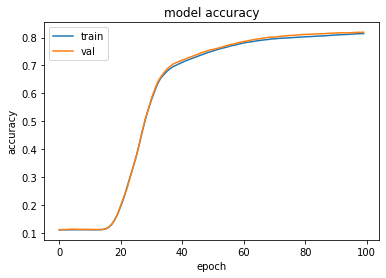

In [315]:
plt.plot(lr.history['accuracy'])
plt.plot(lr.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [324]:
#### Plotting change in loss with change in bias

In [325]:
loss = lr.history['loss']
weights = np.hstack(lr.history['weights'])

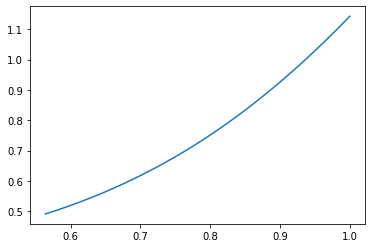

In [326]:
sns.lineplot(x=weights[0],y=loss)
plt.show()

# -------------------------------------- END -----------------------------------

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = [(25,1),(22,1),(23,1),(22,1),(45,0),(39,0),(40,0),(42,0)]
data = pd.DataFrame(data,columns=['age','outcome'])
data

,age,outcome
0,25,1
1,22,1
2,23,1
3,22,1
4,45,0
5,39,0
6,40,0
7,42,0


In [143]:
def logLoss(y_hat,y):
    return -(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))
def findLoss(w):
    loss = 0
    b = 16
    for index,row in data.iterrows():
        x,y = row['age'],row['outcome']
        z = w*x + b        
        y_hat = 1/(1+np.exp(-z))
        if y_hat == 1.0:
            y_hat = 1-10**-8        
        loss += logLoss(y_hat,y)
        #print(f"{y}, {y_hat}, {error}")
    return loss
    

In [152]:
weights = list(np.arange(-1.5,0,0.15)) + list(np.arange(0,0.6,0.15))
losses = list(map(findLoss,weights))


<AxesSubplot: >

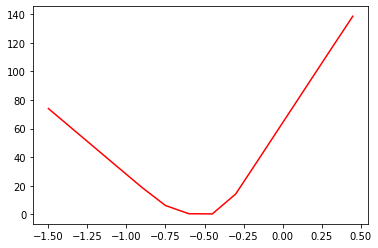

In [153]:
sns.lineplot(x=weights,y=losses, color='red')

In [139]:
w_l = pd.DataFrame(zip(weights,losses),columns=['weights','losses'])
w_l

,weights,losses
0,-1.5,65.000001
1,-1.4,56.400008
2,-1.3,47.800062
3,-1.2,39.200476
4,-1.1,30.603666
5,-1.0,22.028252
6,-0.9,13.611669
7,-0.8,6.134985
8,-0.7,1.549833
9,-0.6,0.215771


In [120]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(data['age'].to_numpy().reshape(-1,1),data['outcome'].to_numpy())


LogisticRegression()

In [121]:
lr.coef_

array([[-0.51390454]])

In [125]:
lr.intercept_

array([16.18862615])